<a href="https://colab.research.google.com/github/Avisikta-Majumdar/Capstone-Project-Play-Store-App-Review-Analysis/blob/main/Notebook_Play_Store_App_Review_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

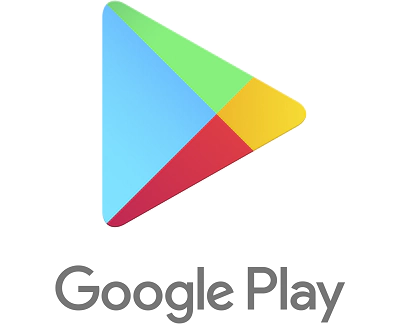

<b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

 <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

 <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Google Play Store Apps Data Analysis (EDA)**

## <font size="+2" color='#053c96'><b> Used Libraries</b>
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Word Cloud

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## <font size="+2" color='#053c96'><b> 1. Mount your drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <font size="+2" color='#053c96'><b>2.  Reading Data


* *working_path* is the location where I have kept both the datasets.

In [3]:
working_path = "/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Submitted Projects/1.EDA ( Play Store App Review )/data/"

In [4]:
working_directory = working_path + 'Play Store Data.csv'
play_store_data = pd.read_csv(working_directory)

## <font size="+2" color='#053c96'>**3. Basic Data Exploration**

* #### 3.1 df.head()

In [5]:
play_store_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


* #### 3.2 df.tail() 

In [6]:
play_store_data.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


* #### 3.3 df.describe()

In [7]:
play_store_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


* ### 3.4 df.info()

In [8]:
play_store_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.3 MB


* ### 3.5 Shape of the DataFrame

In [9]:
play_store_data.shape

(10841, 13)

* ### 3.6 All the column name

In [10]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## <font size="+2" color='#053c96'> **4. Data Cleaning & Data Visualization** 

* ### 4.1 Let's check the no of NaN value present in each column

In [11]:
NaN_Checker = pd.DataFrame({"No Of Total Values": play_store_data.shape[0] , "No of NaN values":play_store_data.isnull().sum(),
                    "%age of NaN values" : round((play_store_data.isnull().sum()  /play_store_data.shape[0])*100 , 4) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
Rating,10841,1474,13.5965
Current Ver,10841,8,0.0738
Android Ver,10841,3,0.0277
Type,10841,1,0.0092
Content Rating,10841,1,0.0092
App,10841,0,0.0000
Category,10841,0,0.0000
Reviews,10841,0,0.0000
Size,10841,0,0.0000
Installs,10841,0,0.0000


As you can see Rating column is having highest no of NaN values

* ### 4.2 In column name replaceing space( ) with underscore(_)

In [12]:
print("Before replaceing columns names are:- \n")
play_store_data.columns

Before replaceing columns names are:- 



Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
play_store_data.columns = [col_name.replace(' ','_') for col_name in play_store_data.columns]
print("After replaceing columns names are:- \n")
print(play_store_data.columns)

After replaceing columns names are:- 

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')


In [14]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

### 4.3 **Installs**

In [15]:
type(play_store_data.Installs.iloc[0][0])

str

#### 4.3.1 Let's convert **Install** to numerical

In [16]:
play_store_data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

#### 4.3.2 We have to remove **Free** from Install column

In [17]:
df_row_free = play_store_data[play_store_data.Installs=="Free"]
df_row_free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Let's *remove row no 10472*

#### 4.3.3 Removing 10472 due to data mismatch in the column

In [18]:
# Row 10472 removed due to missing value of Category
play_store_data.drop(play_store_data.index[10472], inplace=True)

In [19]:
play_store_data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

#### 4.3.4 Removing '+' & ',' from the values of number of installs and converting it to numeric

In [20]:
play_store_data[['Installs']].head(3)

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"


In [21]:
print("Before removing + from Intalls the datatype was ",type(play_store_data.Installs.iloc[0]))
#removing '+' from installs
play_store_data['Installs'] = play_store_data['Installs'].map(lambda x: x.replace('+' , ""))
#removing , from installs then converting into numeric value
play_store_data['Installs'] = pd.to_numeric(play_store_data['Installs'].str.replace(',',''))
print("Before removing + from Intalls the datatype was ",type(play_store_data.Installs.iloc[0]))

Before removing + from Intalls the datatype was  <class 'str'>
Before removing + from Intalls the datatype was  <class 'numpy.int64'>


In [22]:
play_store_data[['Installs']].head(3)

,Installs
0,10000
1,500000
2,5000000


In [23]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

### 4.4 **Price**

#### 4.4.1 Removing '$' from the values of Price and converting it to numeric

In [24]:
print("Datatype of Price column :- ",type(play_store_data[['Price']].iloc[0][0]))

Datatype of Price column :-  <class 'str'>


In [25]:
# play_store_data['Price'] = pd.to_numeric(play_store_data['Price'])

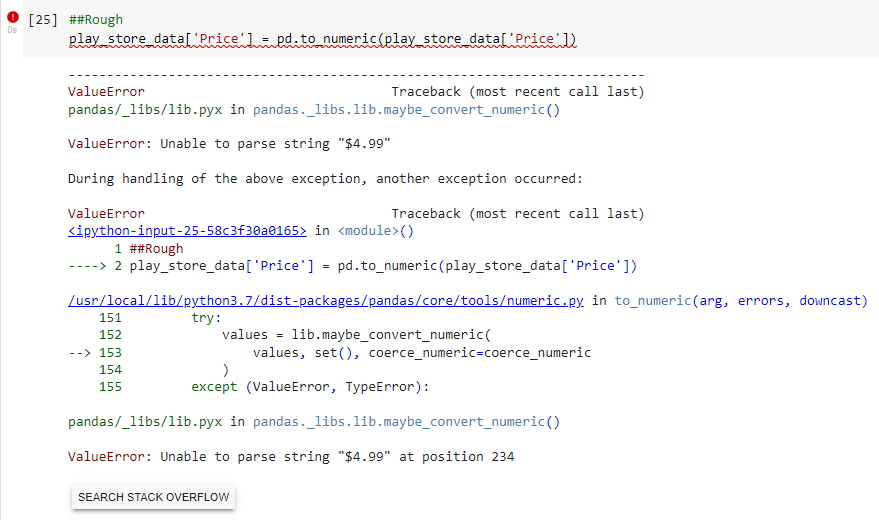

As you can see at **234 row** the price is having dollar sign (```$```) ,so we have to remove $ from all the observations

In [26]:
play_store_data[['Price']].iloc[233:236,:]

,Price
233,0
234,$4.99
235,$4.99


In [27]:
#removing $ symbol then converting into string to numeric value
play_store_data['Price'] = pd.to_numeric(play_store_data['Price'].str.replace('$',''))

In [28]:
play_store_data[['Price']].iloc[233:236,:]

,Price
233,0.00
234,4.99
235,4.99


In [29]:
play_store_data.Price.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Price,10840.0,1.027368,15.949703,0.0,0.0,0.0,0.0,400.0


In [30]:
play_store_data.Price.value_counts().head(9)

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
3.99       63
1.49       46
5.99       30
2.49       26
Name: Price, dtype: int64

In [31]:
play_store_data.shape[0]

10840

In [32]:
price_zero = play_store_data[play_store_data.Price==0.00]
print(f'{round((price_zero.shape[0] / play_store_data.shape[0])*100 , 1)}% application are Free to use')

92.6% application are Free to use


In [33]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [34]:
print(f"Min. install value :-{play_store_data['Installs'].min()}\nMax. installs value:- {play_store_data['Installs'].max()}")

Min. install value :-0
Max. installs value:- 1000000000


 As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column **Log_installs** to dataframe, which is the log of number of installs 

### 4.5 **Log_installs**

Creating new column **Log_installs** by using *log transformation*

In [35]:
play_store_data['Log_installs'] = np.log2( play_store_data['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
play_store_data[['Installs' , 'Log_installs' ]].head(2)

,Installs,Log_installs
0,10000,13.287712
1,500000,18.931569


In [37]:
print(f"Min. install value :- {play_store_data['Log_installs'].min()}\nMax. installs value:- {round(play_store_data['Log_installs'].max(),0)}")

Min. install value :- -inf
Max. installs value:- 30.0


### 4.6 **Reviews**

 Converting **Reviews** column from string to number

In [38]:
type(play_store_data[['Reviews']].iloc[0][0])

str

In [39]:
play_store_data[['Reviews']] = pd.to_numeric(play_store_data["Reviews"])

In [40]:
play_store_data[['Reviews']].head(3)

,Reviews
0,159
1,967
2,87510


In [41]:
type(play_store_data[['Reviews']].iloc[0][0])

numpy.int64

### **4.7 Size**

In [42]:
play_store_data['Size'].value_counts().to_frame()

,Size
Varies with device,1695
11M,198
12M,196
14M,194
13M,191
...,...
209k,1
437k,1
963k,1
73k,1


Will replace **Varies with device** with *NaN*

Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.

In [43]:
type(play_store_data.Size.iloc[0][0])

str

#### **4.7.1 Numeric_Size**

* **Numeric_Size** will *convert all the size into* **MB** format , because most of the application present in this dataset is in MB format

In [44]:
def Numeric_Size():
  # Converting KB to MB 
  play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
  play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
  play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
  play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
  play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
  play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x))

In [45]:
Numeric_Size()

In [46]:
type(play_store_data.Size.iloc[0])

numpy.float64

In [47]:
play_store_data['Size'].value_counts().to_frame()

,Size
11.000,198
12.000,196
14.000,194
13.000,191
15.000,184
...,...
0.027,1
0.642,1
0.647,1
0.039,1


In [48]:
max(play_store_data.Size.values) , min(play_store_data.Size.values)

(100.0, 0.0085)

### 4.8 Let's check info again

In [49]:
play_store_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
 13  Log_installs    10840 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 6.2 MB


After I have converted all the size in MB format there are some columns which is containing NaN values ,removing those observations

### 4.9 dropping NaN

In [50]:
print("Before dropping the NaN values shape was :- ",play_store_data.shape)
play_store_data.dropna( inplace = True )
print("After dropping the NaN values shape is :- ",play_store_data.shape)

Before dropping the NaN values shape was :-  (10840, 14)
After dropping the NaN values shape is :-  (7723, 14)


### 4.10 checking *NaN*

In [51]:
NaN_Checker = pd.DataFrame({"No Of Total Values": play_store_data.shape[0] , "No of NaN values":play_store_data.isnull().sum(),
                    "%age of NaN values" : round((play_store_data.isnull().sum()/play_store_data.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
App,7723,0,0.0
Category,7723,0,0.0
Rating,7723,0,0.0
Reviews,7723,0,0.0
Size,7723,0,0.0
Installs,7723,0,0.0
Type,7723,0,0.0
Price,7723,0,0.0
Content_Rating,7723,0,0.0
Genres,7723,0,0.0


# Finally!! <br>
I have cleaned & converted numerical columns(Installs , Rating , Reviews , Size ,Price , Log_installs) to numrical column

### 4.11 **Checking duplicate values for same App name**

In [52]:
df = play_store_data.copy()

In [53]:
boolean = play_store_data['App'].duplicated()
boolean.sum()

700

In [54]:
play_store_data['App'].value_counts()

ROBLOX                               9
8 Ball Pool                          7
Candy Crush Saga                     7
Zombie Catchers                      6
Temple Run 2                         6
                                    ..
abeoCoder                            1
EC Fairgrounds                       1
bm offers                            1
Mini Golf King - Multiplayer Game    1
Bubble Shooter DX                    1
Name: App, Length: 7023, dtype: int64

 As we can see from the above mentioned data, some of the apps are having multiple rows.


### 4.12 **Let's check out if there data is identical or not**

In [55]:
play_store_data[ play_store_data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Log_installs
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425


 As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [56]:
play_store_data.drop_duplicates(inplace=True)

* Setting up the parameters for the plots

In [57]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

### **4.13 TOP 20 Apps according to Genres**

* What are the top 20 apps present in the google play store as per their Genres?

In [58]:
top_genres = play_store_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [59]:
top_genres.head()

,Genres,Count
0,Tools,633
1,Entertainment,428
2,Education,404
3,Action,318
4,Personalization,277


In [60]:
genres_installs = play_store_data.groupby(['Genres'])[['Installs']].sum()

In [61]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

In [62]:
top_20_genres_installs.head()

,Genres,Count,Installs
0,Tools,633,3525553500
1,Entertainment,428,1664869820
2,Education,404,254445210
3,Action,318,6818937470
4,Personalization,277,997131930


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


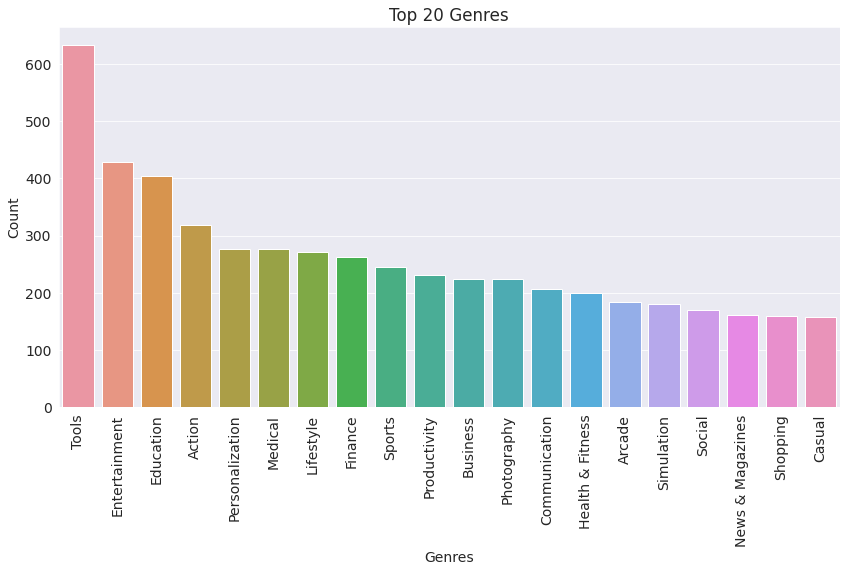

In [63]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

### **4.14 TOP 20 Genres acc. to Installs**

* Which are the Genres that are getting installed the most in top 20 Genres?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


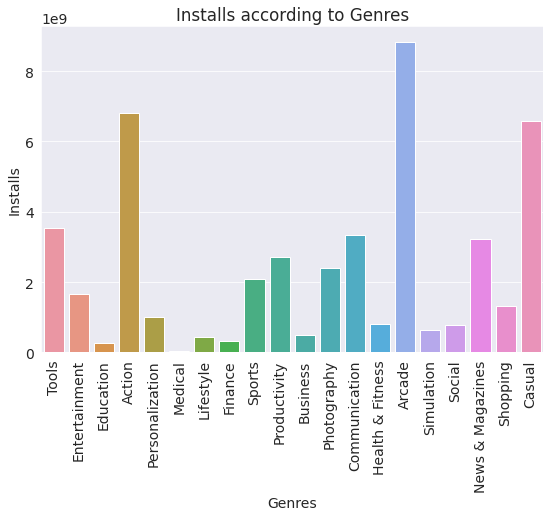

In [64]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

* As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [65]:
top_category = play_store_data.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [66]:
top_category.head()

,Category,Count
0,FAMILY,1590
1,GAME,959
2,TOOLS,633
3,MEDICAL,277
4,PERSONALIZATION,277


In [67]:
category_installs = df.groupby(['Category'])[['Installs']].sum()

In [68]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


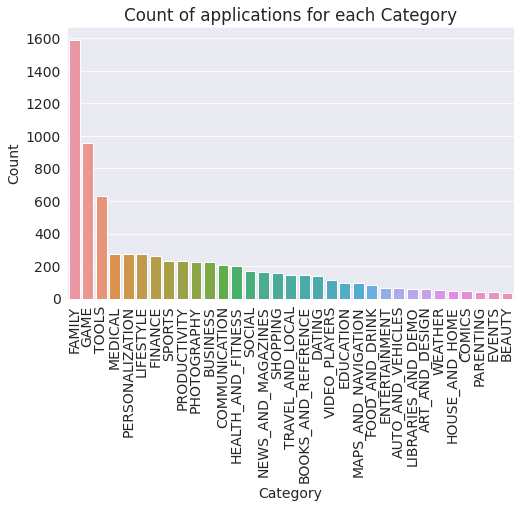

In [69]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


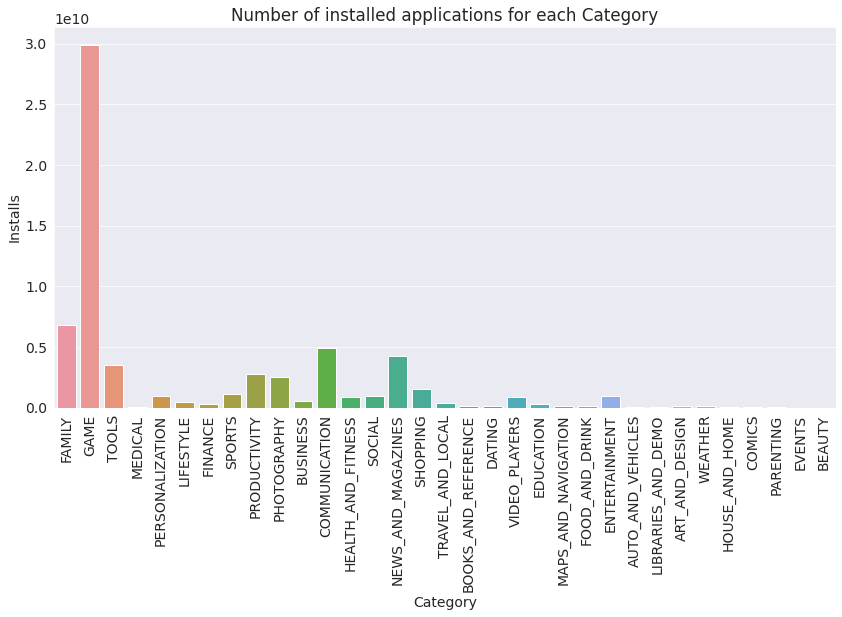

In [70]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

* As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games,  Communication and Tools.

### **4.15 Average rating**

In [71]:
genres_ratings_play_store_data = play_store_data.groupby(['Genres'])[['Rating']].mean()
genres_ratings_play_store_data

,Rating
Genres,
Action,4.261321
Action;Action & Adventure,4.300000
Adventure,4.175000
Adventure;Action & Adventure,4.423077
Adventure;Brain Games,4.600000
...,...
Video Players & Editors,4.025217
Video Players & Editors;Creativity,4.100000
Video Players & Editors;Music & Video,4.000000


In [72]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_play_store_data , on='Genres')
genres_installs_ratings

,Genres,Count,Installs,Rating
0,Tools,633,3525553500,4.010742
1,Entertainment,428,1664869820,4.087150
2,Education,404,254445210,4.298762
3,Action,318,6818937470,4.261321
4,Personalization,277,997131930,4.323827
...,...,...,...,...
107,Comics;Creativity,1,50000,4.800000
108,Card;Brain Games,1,100000,4.400000
109,Role Playing;Brain Games,1,10000000,4.300000
110,Travel & Local;Action & Adventure,1,100000,4.100000


In [73]:
genres_installs_ratings['Rating'].describe()

count    112.000000
mean       4.251060
std        0.193963
min        3.800000
25%        4.106844
50%        4.252635
75%        4.387033
max        4.800000
Name: Rating, dtype: float64

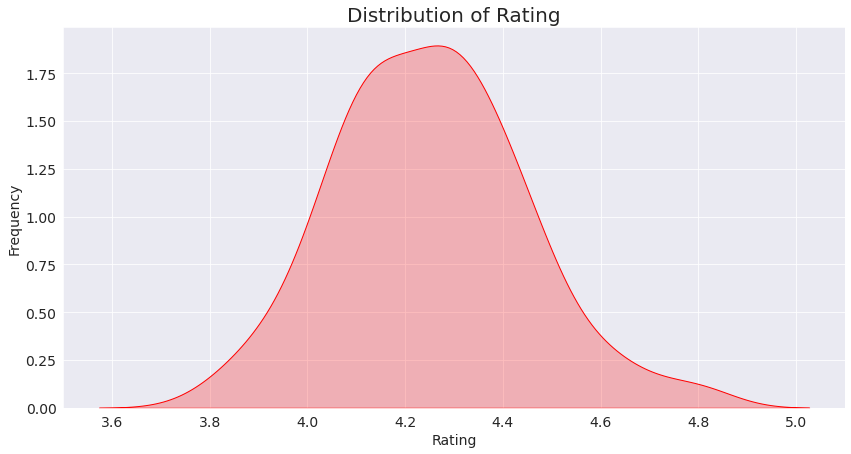

In [74]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

* Most of the rating is in between **4.0 to 4.5**
* There are **very few applications** which got rating **5.0** 

### 4.16 **Highest & Lowest Rated Genres**

In [75]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [76]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


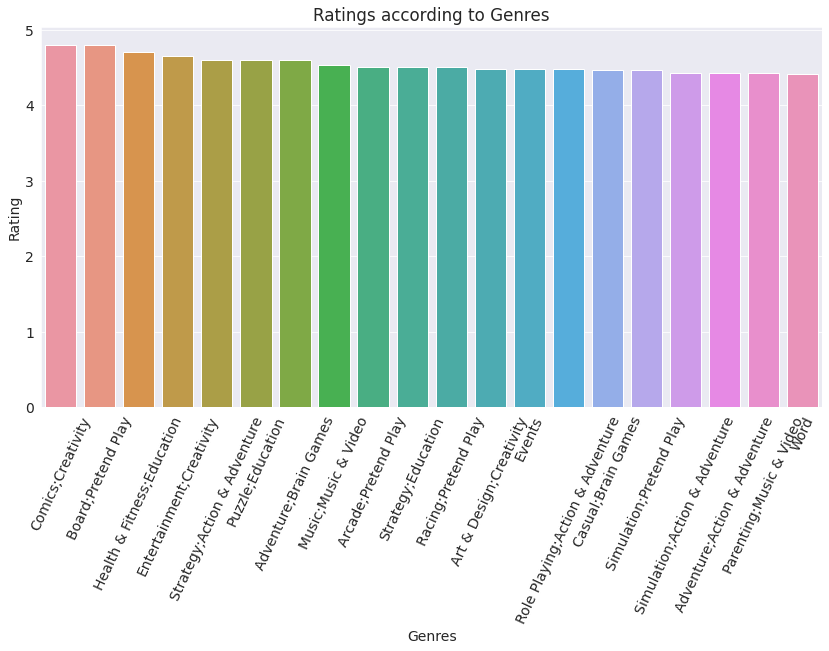

In [77]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


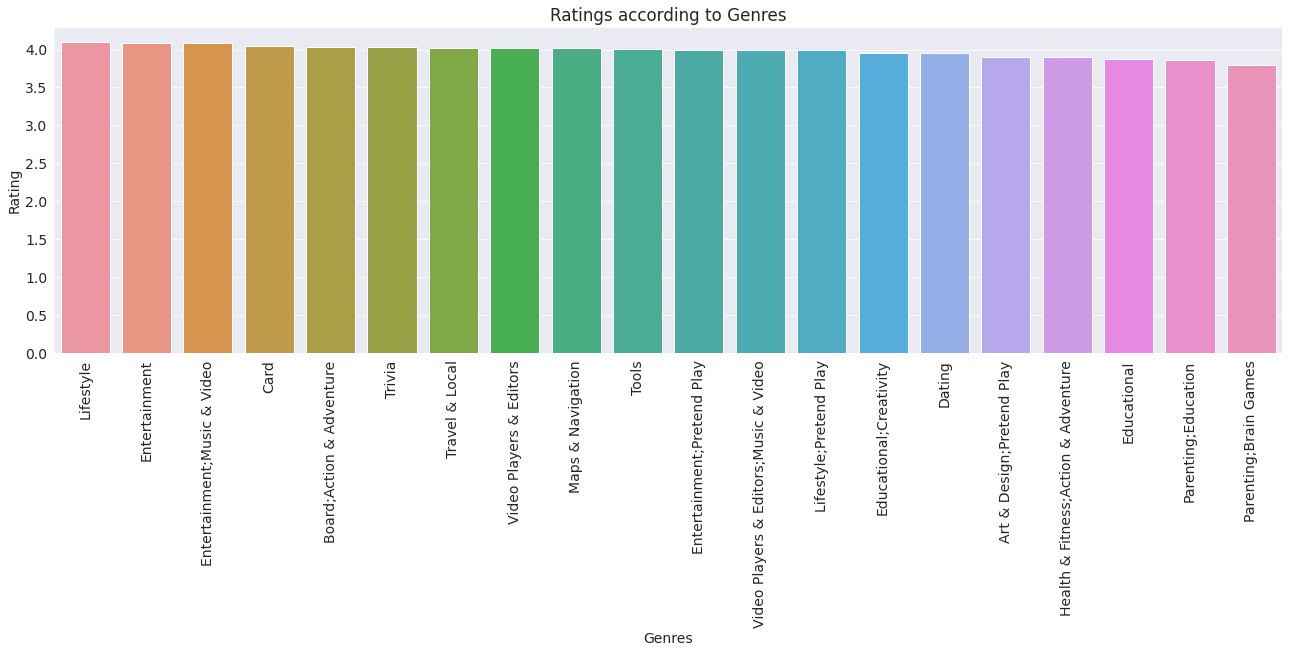

In [78]:
plt.figure(figsize=(22 ,6))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

* What are the count of applications in each category differentiated by their type?

In [79]:
app_count = play_store_data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,55
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,63
3,BEAUTY,Free,37
4,BOOKS_AND_REFERENCE,Free,136
5,BOOKS_AND_REFERENCE,Paid,7
6,BUSINESS,Free,217
7,BUSINESS,Paid,8
8,COMICS,Free,49
9,COMMUNICATION,Free,188


In [80]:
play_store_data_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
play_store_data_app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,55.0,3.0
1,AUTO_AND_VEHICLES,63.0,0.0
2,BEAUTY,37.0,0.0
3,BOOKS_AND_REFERENCE,136.0,7.0
4,BUSINESS,217.0,8.0
5,COMICS,49.0,0.0
6,COMMUNICATION,188.0,18.0
7,DATING,139.0,2.0
8,EDUCATION,91.0,4.0
9,ENTERTAINMENT,66.0,1.0


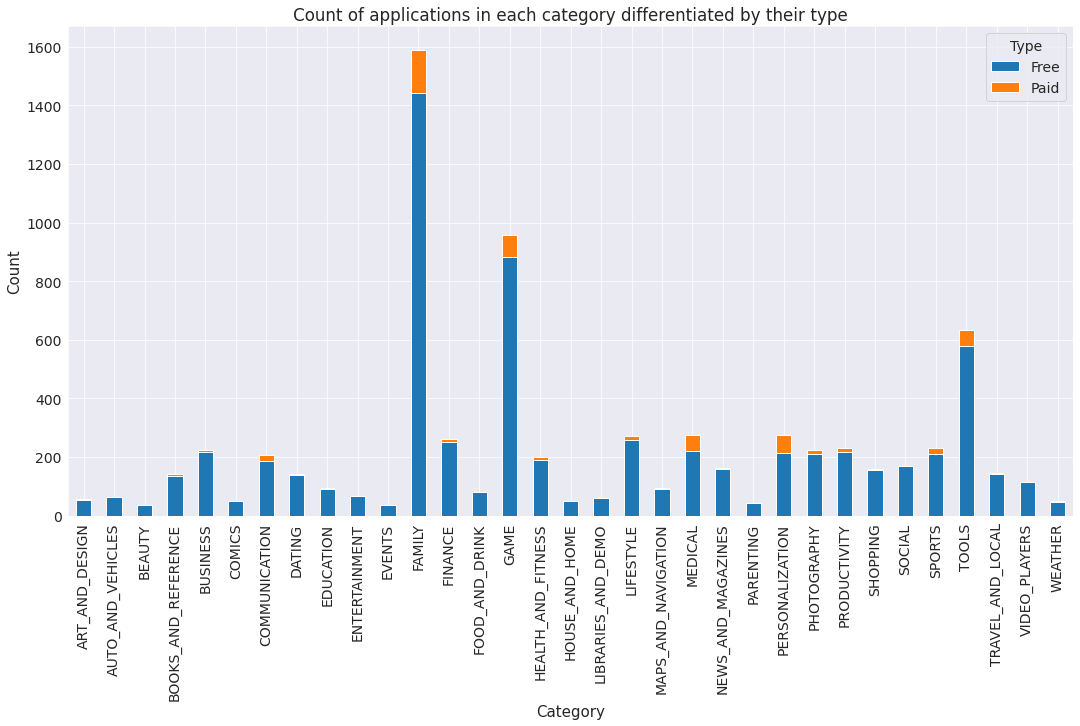

In [81]:
play_store_data_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

* It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.

### 4.17 **Installs acc. to Types**

* How many apps were installed according to its type?

In [82]:
play_store_data['Gaming Category App'] = play_store_data['Category']=='GAME'
play_store_data['Gaming Category App'].value_counts()

False    6459
True      959
Name: Gaming Category App, dtype: int64

In [83]:
categoty_type_installs = play_store_data.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs

,Category,Type,Installs
0,ART_AND_DESIGN,Free,99212100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,43769800
3,BEAUTY,Free,13416200
4,BOOKS_AND_REFERENCE,Free,134766505
5,BOOKS_AND_REFERENCE,Paid,17650
6,BUSINESS,Free,491570360
7,BUSINESS,Paid,212560
8,COMICS,Free,17536100
9,COMMUNICATION,Free,3336666530


In [84]:
categoty_type_installs['Log_Installs'] = np.log2(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


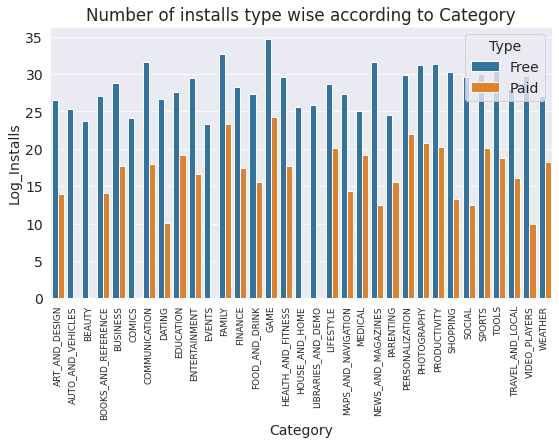

In [85]:
plt.figure(figsize=(9,5))
plt.xticks(rotation=90 ,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'Log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

* It can be conclude that the number of free applications installed by the user are high when compared with the paid ones.

### 4.18 **Size is impacting no of Installs**

* How does size impact on the number of installs of any application?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


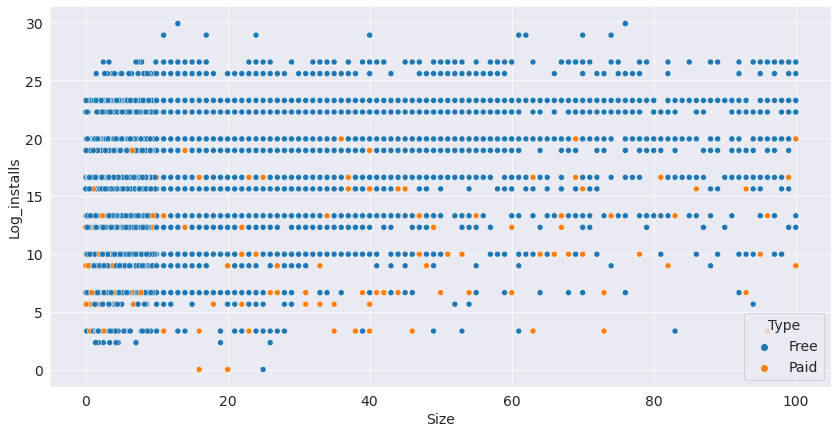

In [86]:
plt.figure(figsize=(14,7))
sns.scatterplot( play_store_data['Size'], play_store_data['Log_installs'], hue = play_store_data['Type'])
plt.show()

* It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

### 4.19 **Histogram of log installs**


In [87]:
play_store_data.loc[play_store_data['Log_installs'] == play_store_data['Log_installs'].min(),'Log_installs']=0

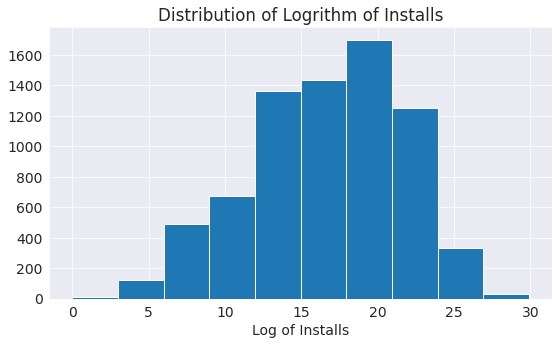

In [88]:
plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs")
plt.hist( play_store_data['Log_installs']);

### 4.20 **Histogram of size**

In [89]:
# to remove null values from size column
play_store_data.loc[ play_store_data['Size'].isnull(),'Size']=0

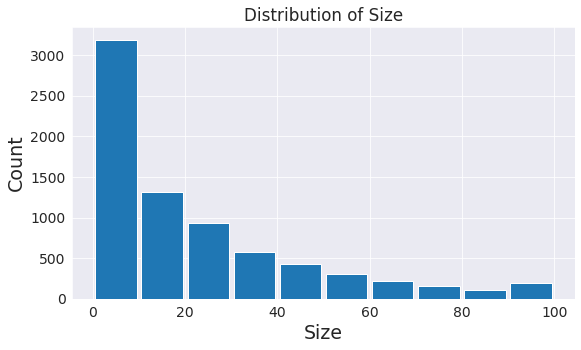

In [90]:
plt.title("Distribution of Size")
plt.hist(play_store_data['Size'] , rwidth=0.9);
plt.xlabel("Size",fontsize=19)
plt.ylabel("Count" , fontsize=19)
plt.show()

* From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

### 4.21 **Correlation**

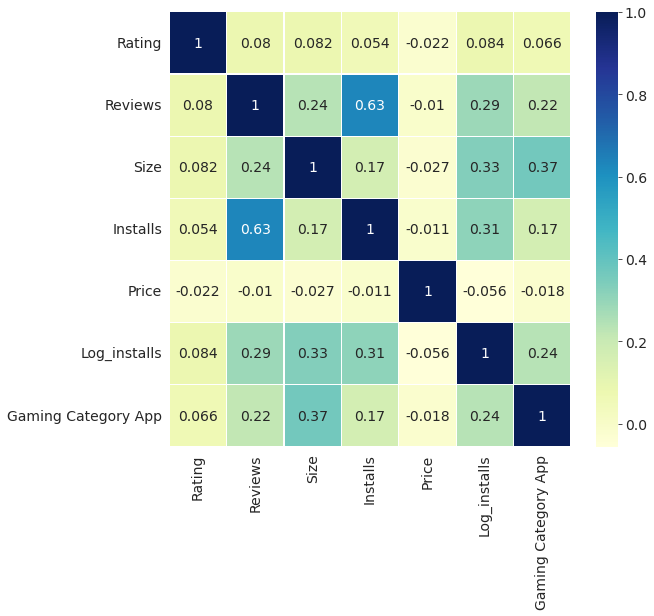

In [91]:
corrmat = play_store_data.corr()  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax,cmap ="YlGnBu",annot = True, linewidths = 0.1)

**NOTES: -**<BR>
* *Installs & Reviews* are highly pos. correlated. The reason maybe those application got gighest no of installs they also got highest no of review

### 4.22 **Category**

In [92]:
play_store_data.Category.value_counts().to_frame()

,Category
FAMILY,1590
GAME,959
TOOLS,633
MEDICAL,277
PERSONALIZATION,277
LIFESTYLE,273
FINANCE,263
SPORTS,232
PRODUCTIVITY,231
PHOTOGRAPHY,225


## <b> Importing *User Reviews dataset*

In [93]:
user_review_path = working_path + 'User Reviews.csv'
user_reviews_df = pd.read_csv(user_review_path)


### user_reviews_df.head(3)

In [94]:
user_reviews_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


### user_reviews_df.tail(3)

In [95]:
user_reviews_df.tail(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### user_reviews_df.shape

In [96]:
user_reviews_df.shape

(64295, 5)

### user_reviews_df.columns

In [97]:
user_reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Checking NaN values

In [98]:
user_reviews_df.isnull().sum().to_frame()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [99]:
user_reviews_df_NaN = user_reviews_df[user_reviews_df.isnull().any(axis=1)]

In [100]:
# and (user_reviews_df.Sentiment_Polarity.isna() ) and (user_reviews_df.Sentiment_Subjectivity.isna() ) 
user_reviews_df_NaN.shape

(26868, 5)

In [101]:
print(f'{round((100*26868/64295),3)}% values are missing')

41.789% values are missing


In [102]:
user_reviews_df_NaN.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


If for any application *Translated_Review	Sentiment	Sentiment_Polarity	Sentiment_Subjectivity* these columns are containing NaN values then will remove those observations from **user_reviews_df**  

### <i> 5.1 Let's remove all the NaN containing rows

In [103]:
user_reviews_df.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'] , inplace = True) 

In [104]:
user_reviews_df.shape

(37427, 5)

### 5.2 Let's check NaN value again!!
 

In [105]:
user_reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now we don't have any NaN values in our dataset.

In [106]:
user_reviews_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


## Merging **user_reviews_df** with **play_store_data**

In [107]:
merged_df = play_store_data.merge(user_reviews_df, on="App")

In [108]:
merged_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Log_installs,Gaming Category App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,18.931569,False,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,18.931569,False,It bad >:(,Negative,-0.725,0.833333


*  Merged_df is having 3 new columns<br> 

* <br>**Sentiment, Sentiment Polarity & Sentiment Subjectivity** <br>
  * #### *Sentiment* basically determines the attitude or the emotion of the writer, 
i.e., whether it is positive or negative or neutral.<br>
  * #### *Sentiment Polarity* is float which lies in the range of [-1,1] <br>where 
    * 1 means positive statement
    * -1 means a negative statement. 
  * #### *Sentiment Subjectivity* generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

#### 5.3 What is the distribution of type of reviews in the dataset?

In [109]:
catewise_wise_total_review_count = merged_df.groupby(['Category']).size().reset_index(name='Total Sentiment Count')
catewise_wise_total_review_count.sort_values('Total Sentiment Count' , ascending  = False).head(4)

,Category,Total Sentiment Count
14,GAME,13676
11,FAMILY,3890
7,DATING,2209
15,HEALTH_AND_FITNESS,1608


In [110]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment

,Category,Sentiment,Sentiment Count
0,ART_AND_DESIGN,Negative,58
1,ART_AND_DESIGN,Neutral,54
2,ART_AND_DESIGN,Positive,233
3,AUTO_AND_VEHICLES,Negative,11
4,AUTO_AND_VEHICLES,Neutral,20
...,...,...,...
93,VIDEO_PLAYERS,Neutral,38
94,VIDEO_PLAYERS,Positive,123
95,WEATHER,Negative,9
96,WEATHER,Neutral,17


In [111]:
category_sentiment['Log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


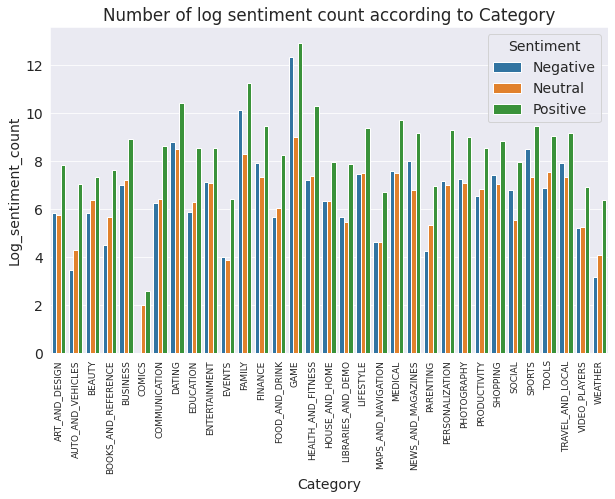

In [112]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=9)

plt.title("Number of log sentiment count according to Category")
sns.barplot('Category', 'Log_sentiment_count', hue='Sentiment', data=category_sentiment);


### 5.4 Histogram of subjectivity

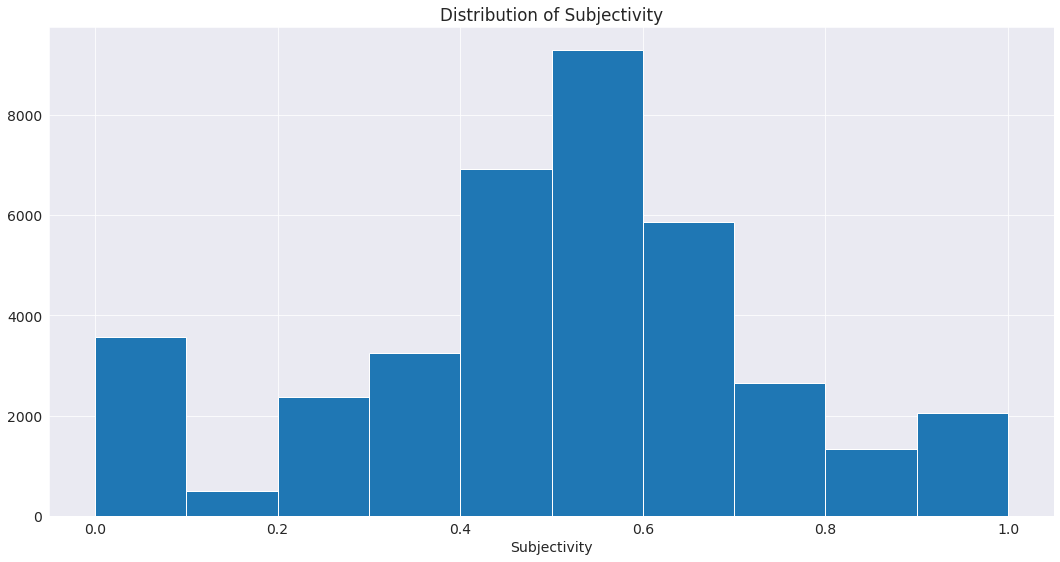

In [113]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

### 5.5 Is sentiment_subjectivity proportional to sentiment_polarity?

In [114]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [115]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


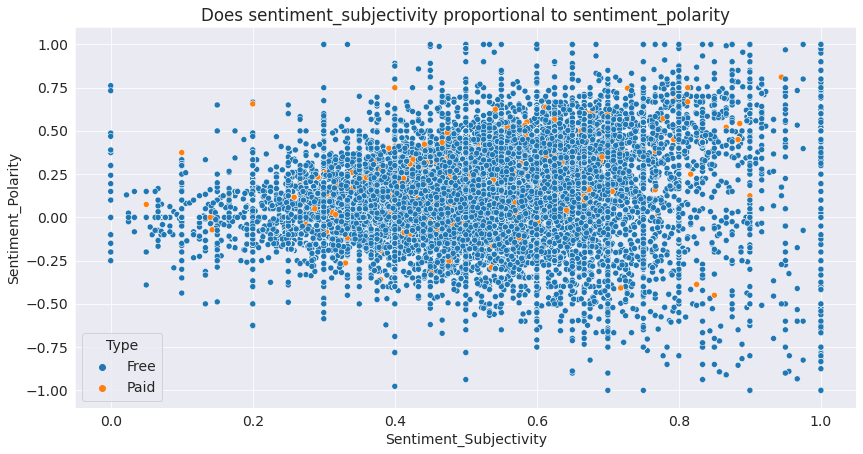

In [116]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'] , hue = merged_df.Type)
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

 From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

### 5.6 **Importing WordCloud**

In [117]:
!pip install wordcloud -q

In [118]:
review_notnull = merged_df[merged_df['Translated_Review'].notnull()]

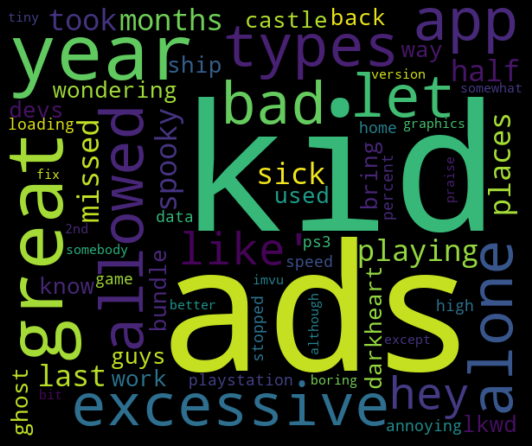

In [119]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 600,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (8, 6),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 5.7 Percentage of Review Sentimets

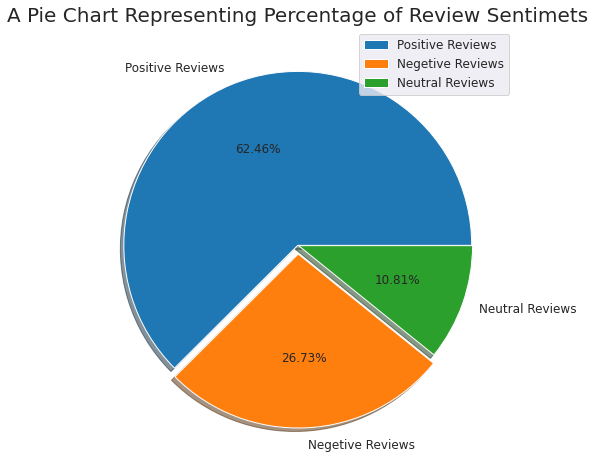

In [120]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

## **Conclusion**
* ### Most of the rating is in between 4.0 to 4.5
* ###  From the correlation matrix of Playstore data Installs are positively correlated to Reviews with the value of 0.63 
* ### The number of free applications installed by the user are high as compared with the paid ones.
* ### 93% applications present in play store data are Free to use.
* ### Bulky applications are less installed by the user.
* ### Category wise GAME got highest no of pos. Review as well as neg. Review.
* ### Max. no of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.
* ### The most occurred word according to WordCloud 
  * Kid 
  * ads
  * types
* ### 65% customers are satisfied
* ### 25% are not satisfied with the application hence they leave a neg review 


## **Future Work**
* ### 1. Treating the outlier of the features.
* ### 2.To do more visualization will use tabulae as well.